In [12]:
import pandas as pd   
import requests   
from bs4 import BeautifulSoup 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [13]:
url = 'https://www.imdb.com/search/title/?count=250&groups=top_1000&sort=user_rating'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [14]:
movie_name = []
year = []
certificate=[]
genre=[]
duration = []
rating = []
metascore = []
votes = []
gross = []
director = []
cast = []

In [15]:
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

In [16]:
for store in movie_data:
    name = store.h3.a.text
    movie_name.append(name)
    
    release_year = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(release_year)
    
    age=store.p.find('span',class_='certificate').text.replace('+', '')  if store.p.find('span', class_ = 'certificate') else '---'
    certificate.append(age)
    
    type_of_movie=store.p.find('span',class_='genre').text.replace('\n','')
    type_of_movie=type_of_movie.split(',')
    genre.append(type_of_movie)
    
    time = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    duration.append(time)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '^^^^^^'
    metascore.append(meta)
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value) >1 else '*****'
    gross.append(grosses)
    actors = store.find("p", class_ = '')
    actors = actors.text.replace('\n', '').split('|')
    actors= [x.strip() for x in actors]
    actors = [actors[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    director.append(actors[0])
    cast.append([x.strip() for x in actors[1].split(",")])


In [17]:
movie_dataset = pd.DataFrame({'Name of movie': movie_name, 'Year of relase': year,'Certificate':certificate, 'Genre':genre,'Watchtime': duration, 'Movie Rating': rating, 'Metascore': metascore, 'Votes': votes, 'Gross collection': gross,"Director": director, 'Cast': cast})


In [18]:
movie_dataset.to_csv('movie_imdb.csv')

In [19]:
movie_dataset.head()

,Name of movie,Year of relase,Certificate,Genre,Watchtime,Movie Rating,Metascore,Votes,Gross collection,Director,Cast
0,The Shawshank Redemption,1994,R,[Drama ],142,9.3,81,"2,671,413",$28.34M,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,---,"[Crime, Drama ]",175,9.2,100,"1,851,422",$134.97M,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Dark Knight,2008,PG-13,"[Action, Crime, Drama ]",152,9.0,84,"2,644,232",$534.86M,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Lord of the Rings: The Return of the King,2003,PG-13,"[Action, Adventure, Drama ]",201,9.0,94,"1,841,103",$377.85M,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O..."
4,Schindler's List,1993,R,"[Biography, Drama, History ]",195,9.0,94,"1,352,381",$96.90M,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car..."


In [20]:
movie_dataset.shape

(250, 11)

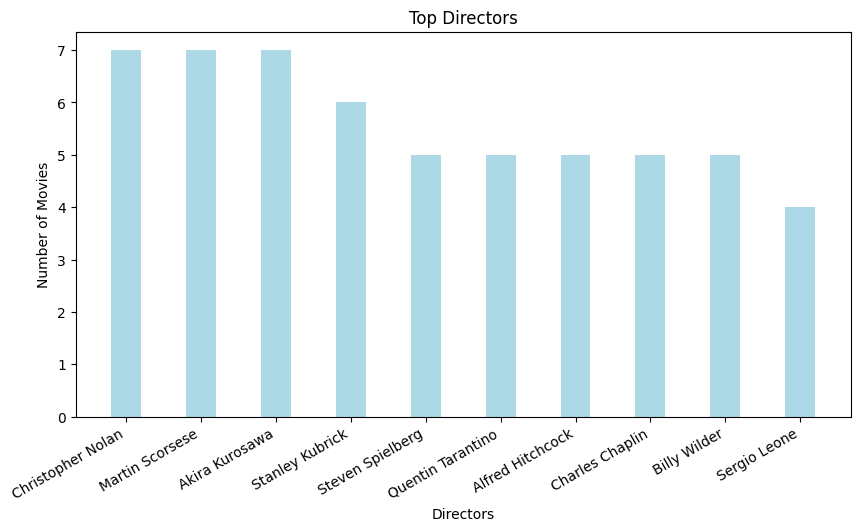

In [21]:
directors = Counter(movie_dataset.Director)
topdirectors = directors.most_common(10)
fig = plt.figure(figsize = (10, 5))
plt.bar([i[0] for i in topdirectors],[i[1] for i in topdirectors], color ='lightblue',width = 0.4)
plt.xlabel("Directors")
plt.ylabel("Number of Movies")
plt.title("Top Directors")
plt.xticks(rotation=30, ha='right')
plt.show()

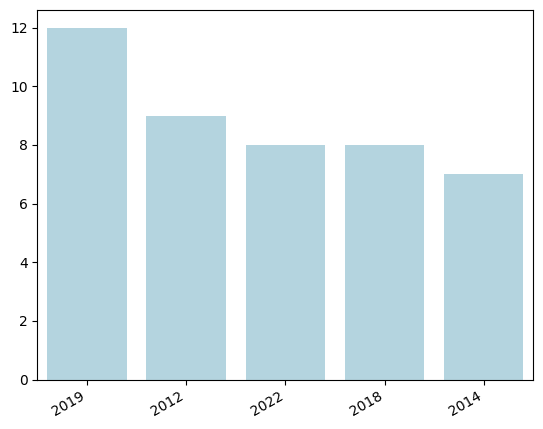

In [22]:
year = Counter(movie_dataset['Year of relase'])
topyear = year.most_common(5)
sns.barplot(x=[i[0] for i in topyear],y=[i[1] for i in topyear],color ='lightblue')
plt.xticks(rotation=30, ha='right')
# Show the plot
plt.show()
